# Part I - FordGo Bike sharing dataset exploration
## by Muzimba Dingani

## Introduction

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## Preliminary Wrangling


In [85]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.cm import get_cmap
from matplotlib.patches import Patch

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#load dataset
bikes = pd.read_csv('./fordgobike_tripdata.csv')
bikes.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### What is the structure of your dataset?

dataset has 183411 rows with 16 columns 

### What is/are the main feature(s) of interest in your dataset?

 1. duration_sec              
 2. start_time               
 3. end_time                
 4. start_station_name       
 5. end_station_name          
 6. bike_id                    
 7. user_type                 
 8. member_birth_year        
 9. member_gender            
 10. bike_share_for_all_trip  


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

1. duration_sec
2. start_station_name
3. end_station_name
4. user_type
5. user gender
6. user birth year

In [4]:
bikes.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
168767,1373,2019-02-04 13:20:23.4380,2019-02-04 13:43:17.3000,88.0,11th St at Bryant St,37.77003,-122.411726,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,5137,Subscriber,1984.0,Male,No


### Data Assement

#### quality issues
1. completeness issues- data isn't completed for example in member_gender columns
2. validity issues - member_birth year is in float data type



They are some of the issues that I am not going to tackle because they do not fall part of this analysis. For example data type of start_time and end_time variable must be datetime but because these 2 variables are not part of my analysis I will not consider them as issues that needs to be addressed.

## Data Cleaning

1. drop all columns that are not completed

In [5]:
# copy dataset
bikes_clean = bikes.copy()

#### code


In [6]:
#droping incomplet columns
bikes_clean.dropna(axis=0, how='any', inplace=True)

2. remove all columns that aren't of interest in the study.

### code

In [7]:
#list columns to remove
remove_cols = [ 'start_time', 'end_time', 'start_station_id','start_station_latitude', 
               'start_station_longitude', 'end_station_id','end_station_latitude', 'end_station_longitude']

#drop columns
bikes_clean.drop(remove_cols,inplace=True,axis=1)
bikes_clean.head()

,duration_sec,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
2,61854,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes
5,1793,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959.0,Male,No


3. changing the member birth year to int

### code 

In [8]:
#changig data type to int
bikes_clean.member_birth_year = bikes_clean.member_birth_year.astype(int)
bikes_clean.head()

,duration_sec,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No
2,61854,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No
3,36490,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No
4,1585,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes
5,1793,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,No


## Univariate Exploration


### 1.   How many people who participated in the rides who where willing to share bike for the whole trip?

### visualization

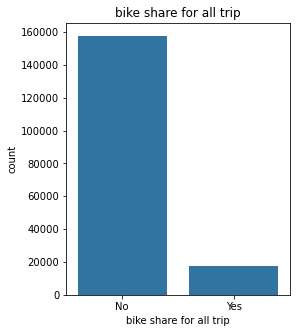

In [9]:
#taking the first color
color = sb.color_palette()[0]
#plot
plt.figure(figsize=[4,5])
sb.countplot(data=bikes_clean, x='bike_share_for_all_trip',color=color,dodge=False)
plt.title('bike share for all trip')
plt.xlabel('bike share for all trip');

#### observation

we can not that a lot of people weren't willing to share the bikes for the whole trip

### 2. what gender participated in this bike ride?

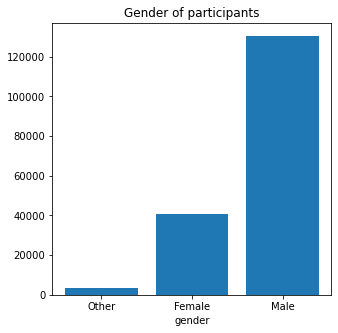

In [10]:
#get the values,index of gender
gender = bikes_clean.member_gender.value_counts().sort_values()

#plot
color = sb.color_palette()[0]
plt.figure(figsize=[5,5])
plt.bar(x=gender.index,height=gender.values,color=color)
plt.title('Gender of participants')
plt.xlabel('gender');

### observation 
we can observe that a most of the participants where male followed by female and then other gender

### 3. who are the top 5 age groups that participated?

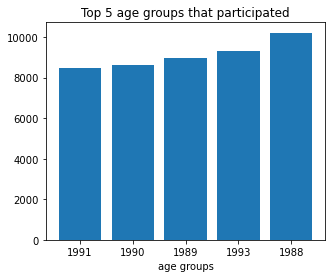

In [11]:
#get top 5 values, index
index = bikes_clean.member_birth_year.value_counts().head().sort_values().index
values = bikes_clean.member_birth_year.value_counts().head().sort_values().values
#changing values to string
age_groups =[]
for i in index:
    age_groups.append(str(i) )

#plot
color = sb.color_palette()[0]
plt.figure(figsize=[5,4])
plt.bar(x= age_groups,height=values,color=color)
plt.title('Top 5 age groups that participated')
plt.xlabel('age groups');

#### observation

We can note that most of the participations are from the year 1988

### 4. the most user who participated where customers?

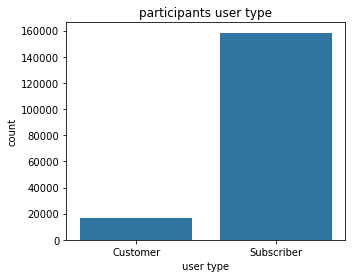

In [12]:
#plot
color = sb.color_palette()[0]
plt.figure(figsize=[5,4])
sb.countplot(data=bikes_clean, x='user_type',color=color)
plt.title('participants user type')
plt.xlabel('user type');

#### observations

we can not that most of the user who participated where subscribers than customers

### 5. What is the place where participants started the ride the most?

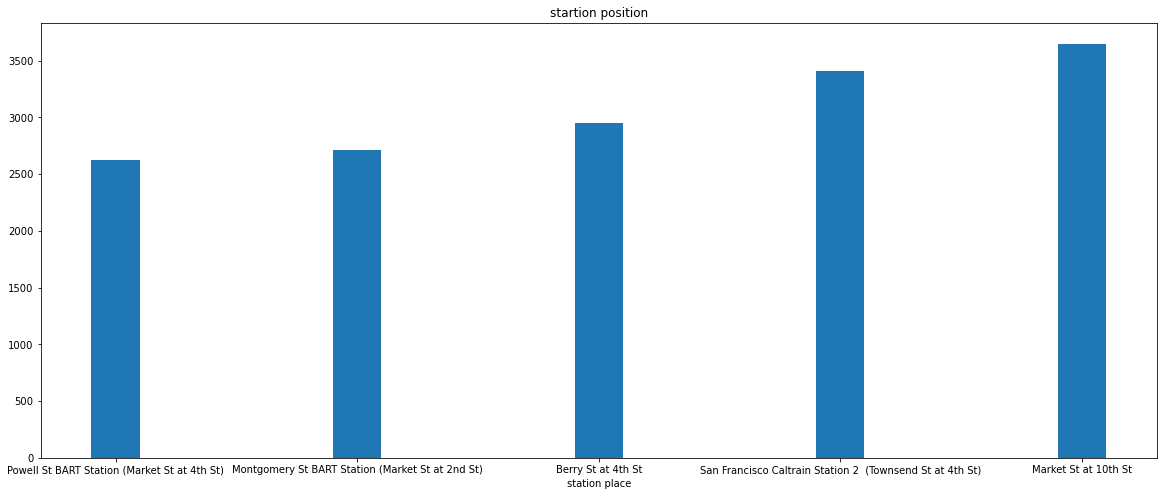

In [13]:
# get the most values, index
station_index = bikes_clean.start_station_name.value_counts().head().sort_values().index
station_value = bikes_clean.start_station_name.value_counts().head().sort_values().values

#plot
color = sb.color_palette()[0]
plt.figure(figsize=[20,8])
plt.bar(x=station_index,height=station_value,width=0.2)
plt.title('startion position')
plt.xlabel('station place');

### observation
We can note that most of the participates started at the place Market st at 10th st

### 6. What trends can we notice from the duration took by participants?

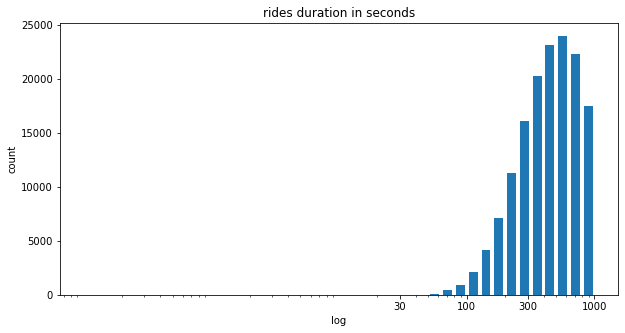

In [14]:
#creating bins
bins = 10**np.arange(-1, 3+0.1, 0.1)
ticks = [30,100,300,1000]
#convert ticks into strings to be displayed along the y axis
labels = ['{}'.format(v) for v in ticks]
#plot hist
plt.figure(figsize=([10,5]))
plt.hist(data=bikes_clean, x='duration_sec', bins=bins,rwidth=0.7)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.title('rides duration in seconds')
plt.xlabel('log')
plt.ylabel('count');

### observations
we can notice that the distribution of the duration of participants is more or less unimodal
We can also notice that most of the participants' duration time was close to the mean that it was for a few number of participants.

## Bivariate Exploration


In [15]:
bikes_clean.head()

,duration_sec,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No
2,61854,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No
3,36490,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No
4,1585,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes
5,1793,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,No


### 7. Where more female willing to share their rides with others than any other member gender?

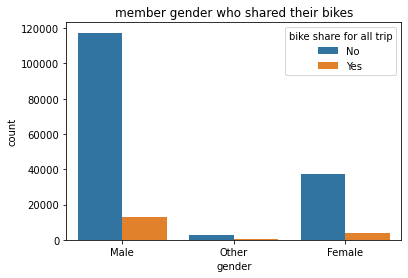

In [16]:
#plot
sb.countplot(data=bikes_clean, x='member_gender', hue='bike_share_for_all_trip')
plt.title('member gender who shared their bikes')
plt.legend(title='bike share for all trip')
plt.xlabel('gender');

#### observations
- We can notice that more men were willing to share their rides than they weren't and also than any other group. This can be due to the fact that more men participated than any other gender. 
- we can see a trend that in all the member genders more were willing to share their rides than few who weren't willing to share their rides.

### 8. is it possible that many male participants were customers?

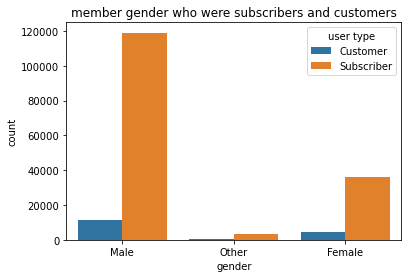

In [17]:
#plot
sb.countplot(data=bikes_clean, x='member_gender', hue='user_type')
plt.xlabel('gender')
plt.legend(title='user type')
plt.title('member gender who were subscribers and customers');

#### observations

- We can note that among the participants many subscribers where male, followed by female subscribers.
- We can also notice that among the participants it was more likely that a participant chosen despite gender was likely to have subscribed than being a customer.

### 9. Are more customers likely to share their bikes than are subscribers?

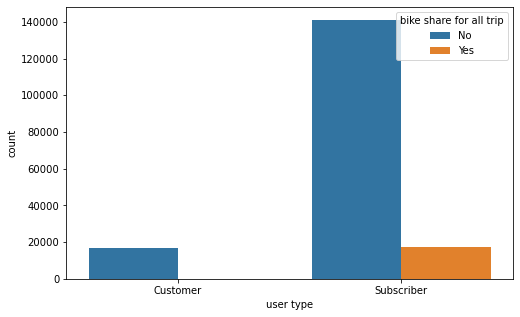

In [18]:
#plot
plt.figure(figsize=(8,5))
sb.countplot(data=bikes_clean, x='user_type', hue='bike_share_for_all_trip')
plt.legend(title='bike share for all trip')
plt.xlabel('user type');

### observations
- we can notice tha more subscribers werent willing to share their bike along the course of the trip than the customers.
- we can also notice that it is more like that a subscriber will share their bike for all trip than it is for a customer to share their bike for all trip.

### 10.  is there a relationship between participants's gender and the duration of seconds they participated.

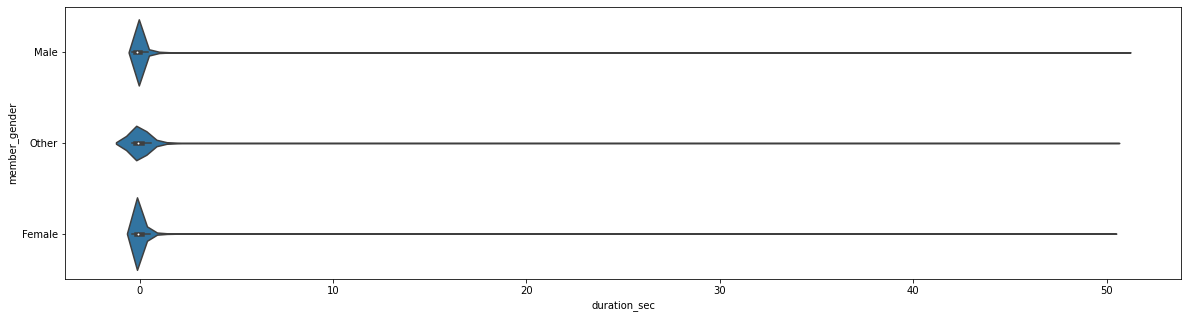

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bikes_violin = bikes_clean.copy()

bikes_violin.duration_sec = scaler.fit_transform( bikes_violin.duration_sec.values.reshape(-1,1) )

plt.figure(figsize=[20,5])
sb.violinplot(data=bikes_violin, x='duration_sec', y='member_gender', color=color);

### observations
From the violinplot we can see that the data has a lot of outliers and so we can't get more of an insight.

### 11. visualization

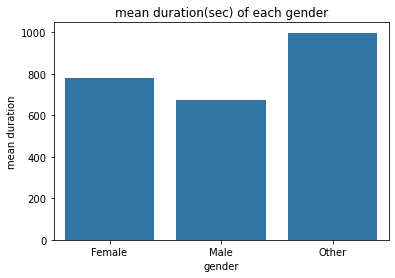

In [20]:
gender_duration = bikes_clean[['duration_sec', 'member_gender']].groupby(['member_gender']).mean()
mean_values = gender_duration.values.reshape(3,)
gender_columns = gender_duration.index
gender_dict = {}

for i,gender in enumerate(gender_columns):
    gender_dict[gender] = mean_values[i]
    

gender_df = pd.DataFrame(gender_dict.items(),columns=['gender', 'mean_duration_sec'])


sb.barplot(data=gender_df, x='gender', y='mean_duration_sec',color=color )
plt.title('mean duration(sec) of each gender')
plt.ylabel('mean duration');

### observation

from the adapted bar plot we can see that most of the group which had the highest average number  of seconds participated was the other gender followed by the female. However a mean can be misleading so we can't give a conclusion that overally the Other gender had more minutes than more the othe groups

### 12. visualization

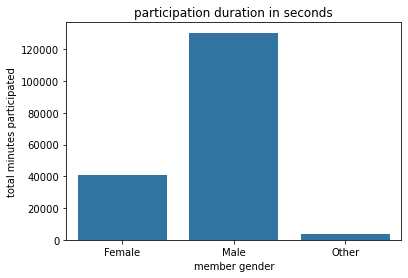

In [21]:
gender_box = bikes_clean[['duration_sec', 'member_gender']].groupby(['member_gender']).size()
sb.barplot(x=gender_box.index, y=gender_box.values,color=color)
plt.title('participation duration in seconds')
plt.ylabel('total minutes participated')
plt.xlabel('member gender');

### observations
From the visualization above we can note that the male gender had more minutes collectively than the other 2 remaining gender.

### 13. Which generation had the most duration seconds in this participation ride

In [22]:
def cal_age(column,current_yr=2022):
    return current_yr - column

In [23]:

def generations(age):
    #finding the generation of age group
    
    if age >= 10 and age < 25:
        return 'Gen Z' 
    elif age >= 26 and age < 41:
        return 'Millennials'
    elif age >= 42 and age < 57:
        return 'Gen X'
    elif age >= 58 and age < 67:
        return 'Boomers II'
    elif age >= 68 and age < 76:
        return 'Boomers I'
    elif age >= 77 and age < 94:
        return 'Post War'
    elif age >= 95:
        return 'WWII'


In [24]:
#creating new generation column
age = bikes_clean[['duration_sec','member_birth_year', 'user_type','member_gender','start_station_name']]
age['age'] = age['member_birth_year'].apply(cal_age)
age['generation'] =age['age'].apply(generations)
gen = age[['duration_sec', 'generation']].groupby(['generation']).size().sort_values().index
gen_values = age[['duration_sec', 'generation']].groupby(['generation']).size().sort_values().values


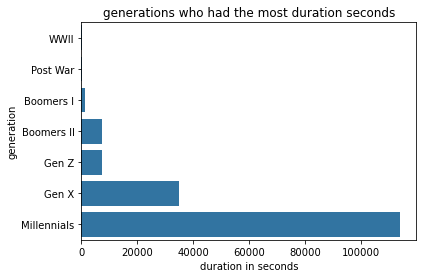

In [25]:
sb.barplot(y=gen, x=gen_values,color=color)
plt.title('generations who had the most duration seconds')
plt.xlabel('duration in seconds');

### observations
- we can note that melenials had the most duration in seconds

### 14. Which gender belonging to a certain generation participated the most

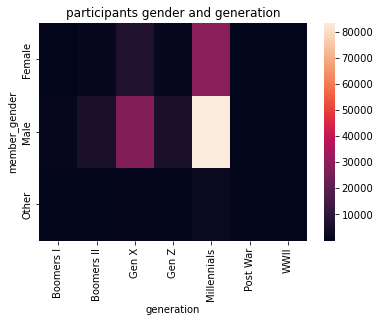

In [26]:

counts = age[['member_gender','generation']].groupby(['member_gender','generation']).size()
counts = counts.reset_index(name='counts')
counts = counts.pivot(index='member_gender', columns='generation', values='counts')

#plot
sb.heatmap(counts)
plt.title('participants gender and generation');

In [27]:
counts

generation,Boomers I,Boomers II,Gen X,Gen Z,Millennials,Post War,WWII
member_gender,,,,,,,
Female,182,1437,6843,1608,28624,35,14
Male,1087,5640,27310,5788,83236,232,61
Other,22,185,869,25,2207,26,1


#### observations
- from this we can note that most of the milliennials who participated where male followed by female milliennials.
- We can also noticed that most of the Gen X participants were male

## Multivariate Exploration


### 15. which generation user type had the most duration in seconds?

In [28]:
gen_sec = age[['duration_sec','user_type','generation']].groupby(['user_type','generation']).mean()
gen_sec = gen_sec.reset_index()
gen_sec

,user_type,generation,duration_sec
0,Customer,Boomers I,1561.000000
1,Customer,Boomers II,1228.379599
2,Customer,Gen X,1304.567136
3,Customer,Gen Z,1559.574223
4,Customer,Millennials,1296.961253
5,Customer,Post War,1432.600000
6,Customer,WWII,906.200000
7,Subscriber,Boomers I,719.885527
8,Subscriber,Boomers II,730.875150
9,Subscriber,Gen X,650.520976


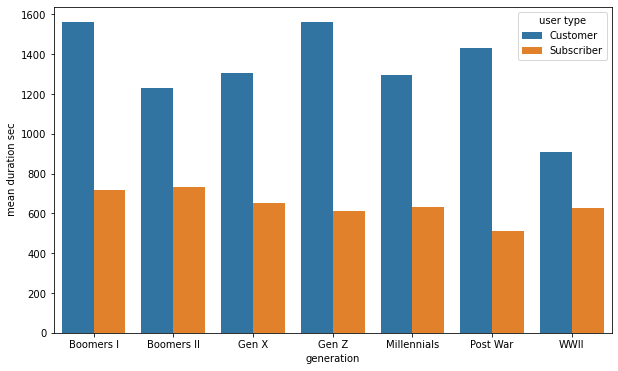

In [29]:
plt.figure(figsize=[10,6])
sb.barplot(data=gen_sec, x='generation', y='duration_sec', hue='user_type')
plt.legend(title='user type')
plt.ylabel(' mean duration sec');

### observations
- Gen Z had the most group of customers that a higher mean compared to other generations
- generation Boomers II had the most subscribers that had the highest mean compared to other generations

### 16 Is there a relationship between a user type, member gender and the duration in seconds of the trip?

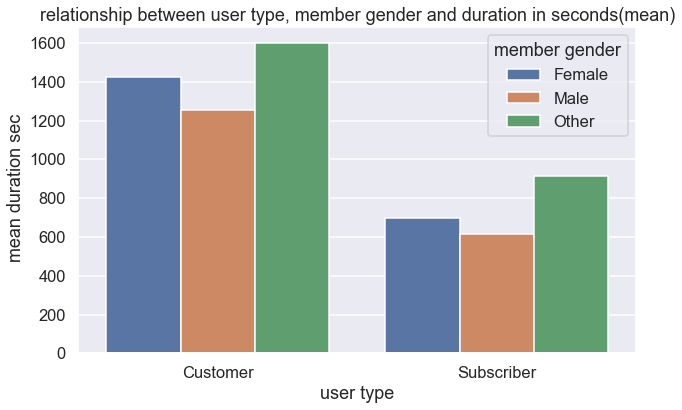

In [99]:
duration_user_gender = bikes_clean[['duration_sec','user_type','member_gender']].groupby(['user_type','member_gender']).mean()
duration_user_gender = duration_user_gender.reset_index()

plt.figure(figsize=[10,6])
sb.barplot(data=duration_user_gender, x='user_type', y='duration_sec', hue='member_gender')
plt.legend(title='member gender')
plt.title('relationship between user type, member gender and duration in seconds(mean)')
plt.ylabel(' mean duration sec')
plt.xlabel('user type');

### observation
- we conclude that among the customers who have a high in averange seconds during the trip, we note that the other gender is has the highest mean duration in seconds than any other customer gender and also than any othe subscriber.
- We also note that the other gender among subscribers has the highest mean duration in seconds.

### 17 Is there a relationship between a bike share for all trip, member gender and the duration in seconds of the trip?

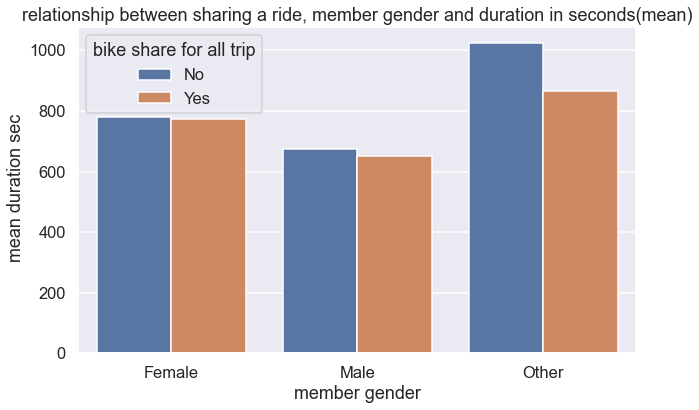

In [102]:

duration_share_gender = bikes_clean[['duration_sec','bike_share_for_all_trip','member_gender']].groupby(['bike_share_for_all_trip','member_gender']).mean()
duration_share_gender = duration_share_gender.reset_index()

#plot
plt.figure(figsize=[10,6])
sb.barplot(data=duration_share_gender, x='member_gender', y='duration_sec', hue='bike_share_for_all_trip')
plt.legend(title='bike share for all trip')
plt.title('relationship between sharing a ride, member gender and duration in seconds(mean)')
plt.ylabel(' mean duration sec')
plt.xlabel('member gender');

#### observation
- we can note that the other gender who doesn't want to share their bike for all trip have high mean duration in seconds than any other gender

## Conclusions


- people who where between at the age of 26 and 41 participated the most
- most of the men who participated where millenials that is between 26-41 years of age.
- people of age 67 - 78 are likely to be customers than subscribers.
- the chance that a participant is a men is higher than the participant be either a woman or of other gender.
- there is a high chance that a participant who is a subscriber is not willing to share his bike across all the trip than if the  participant was a customer.